In [1]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
WRFdat = xr.open_dataset('/Users/daniel/wrfout.nc')

In [3]:
WRFdat

<xarray.Dataset>
Dimensions:                (Time: 25, bottom_top: 32, bottom_top_stag: 33, seed_dim_stag: 8, soil_layers_stag: 4, south_north: 60, south_north_stag: 61, west_east: 73, west_east_stag: 74)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    THM                    (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MU                     (Time, south_north, west_east) float32 ...
    MUB                    (Time, south_north, west_east) float32 ...
    NEST_POS               (Time, south_north, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    P_HYD                  (Time, bottom_top, south_north, west_east) float32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (Time) float32 ...
    ITIMESTEP              (Time) int32 ...
    QVAPOR                 (Time, bottom_top, south_north, west_east) float32 ...
 

In [4]:
WRFdat.T2
# Look at the dimensions of the wind variable 'U' and 'V'
# Do we notice anything different?
# How does this relate to our earlier discussion about different types of grids?

<xarray.DataArray 'T2' (Time: 25, south_north: 60, west_east: 73)>
[109500 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:

In [5]:
t2m = WRFdat.T2[0,:,:]
lons = WRFdat.XLONG[0,:,:]
lats = WRFdat.XLAT[0,:,:]

In [6]:
WRFdat.U
# The difference we notice is that instead of memory order XY, we have XYZ, meaning that we record the wind
# at a certain altitude as well

# This relates to the discussion about different types of grids in that....

<xarray.DataArray 'U' (Time: 25, bottom_top: 32, south_north: 60, west_east_stag: 74)>
[3552000 values with dtype=float32]
Coordinates:
    XTIME    (Time) datetime64[ns] ...
    XLAT_U   (Time, south_north, west_east_stag) float32 ...
    XLONG_U  (Time, south_north, west_east_stag) float32 ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east_stag
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  x-wind component
    units:        m s-1
    stagger:      X

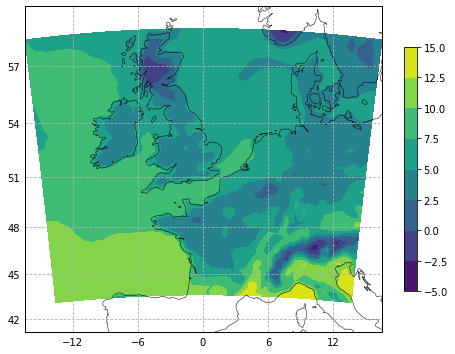

In [7]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black',linewidth=0.5)

ax.set_extent([lons.values.min(),lons.values.max(), lats.values.min()-2, lats.values.max()])

cf = ax.contourf(lons, lats, t2m-273.15, transform=ccrs.PlateCarree())

plt.colorbar(cf, shrink=0.75)

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.xlabels_top=False
grd.ylabels_right=False
    

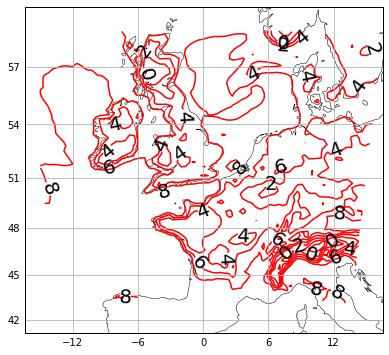

In [8]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m',color='black',linewidth=0.5)

ax.set_extent([lons.values.min(),lons.values.max(), lats.values.min()-2, lats.values.max()])
            
t_cl = ax.contour(lons,lats,t2m-273.15,np.array([-2,0,2,4,6,8]),
                 colors='red',linestyles='-',transform=ccrs.PlateCarree())

plt.clabel(t_cl,inline=1,fontsize=20,fmt='%1.0f',inline_spacing=1,colors='black')

#grd = ax.gridlines(draw_labels=True,linestlye='--')
# Weird error here, why do we have to take out linestyle?
grd = ax.gridlines(draw_labels=True)
grd.xlabels_top = False
grd.ylabels_right = False

In [9]:
# Advanced plots 1

# First we define our variables
# In doing so we choose the hour in which we take our data from, we choose 0 for the first hour of the day
t2m = WRFdat.T2[0,:,:]   # 2-metre temperature
z = WRFdat.HGT[0,:,:]    # height above sea level of the ground
surfp = WRFdat.PSFC[0,:,:]  # atmospheric pressure at the ground

In [10]:
surft = t2m + (6.5*z/1000)  # create 'surft' variable representing atmospheric pressure (where)...?
mslp = surfp*np.exp(9.81/(287.0*surft)*z)*0.01 + (6.7*z/ 1000)   
# The MSLP variable is the Mean Sea Level Pressure variable which is used to show
# regions of low and high pressure

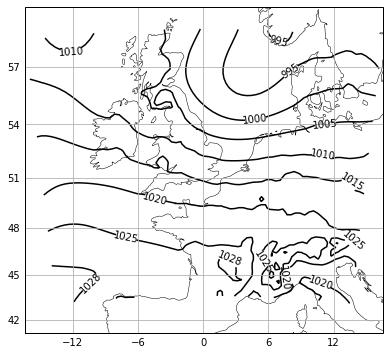

In [11]:
fig = plt.figure(figsize=[8,6])   # What do these mean
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m',color='black',linewidth=0.5)  # meaning?

ax.set_extent([lons.values.min(),lons.values.max(), lats.values.min()-2, lats.values.max()])

mslp_cl = ax.contour(lons,lats,mslp,np.array([990,995,1000,1005,1010,1015,1020,1025,1028,1030,1035]),
                 colors='black',linestyles='-',transform=ccrs.PlateCarree())

plt.clabel(mslp_cl,inline=1,fontsize=10,fmt='%1.0f',inline_spacing=1,colors='black')

#grd = ax.gridlines(draw_labels=True,linestlye='--')
# Weird error here, why do we have to take out linestyle?
grd = ax.gridlines(draw_labels=True)
grd.xlabels_top = False
grd.ylabels_right = False

In [19]:
# Advanced plots 2

# First we define our variables
U = WRFdat.U10[0,:,:]
V = WRFdat.V10[0,:,:]

Wind_speed = np.sqrt(U**2 +V**2)

# Calculate area of max windspeed
iwsmx, jwsmx = np.unravel_index(Wind_speed.argmax(), Wind_speed.shape)
# iwsmx is the row the max value takes in the array and jwsmx is the column
# By running this code we avoid flatten the array, find the max and then put the array back together to find the index of the max value
# np.where(Wind_speed==np.amax(Wind_speed))

Text(0.5, 1.0, 'Transect for cross-section plot')

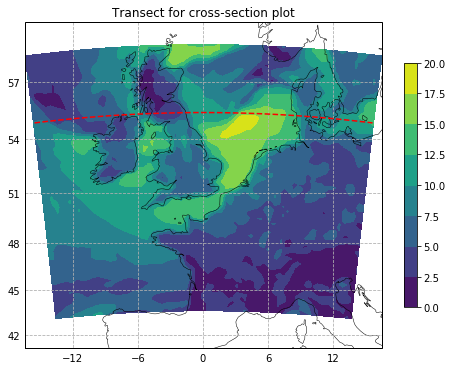

In [41]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black',linewidth=0.5)

ax.set_extent([lons.values.min(),lons.values.max(), lats.values.min()-2, lats.values.max()])

NAMEnow = ax.contourf(lons, lats, Wind_speed, transform=ccrs.PlateCarree())  # What does PlateCarree do?

plt.plot(lons[iwsmx,:], lats[jwsmx,:], 'r--', transform=ccrs.PlateCarree())
# How does the above work because its variable about latitude too?

plt.colorbar(NAMEnow,shrink=0.75, cmap='jet')  #why doesn't jet work here?

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.xlabels_top=False
grd.ylabels_right=False

plt.title("Transect for cross-section plot")

In [82]:
# Advanced plots 3

# Defining variables 
# First we note that wind speeds are calculated at staggered grids
# We must calculate wind speed variables that are 'unstaggered'
u = WRFdat.U[0,:,:]
v = WRFdat.V[0,:,:]
um = 0.5*(u[:,:,:-1] + u[:,:,1:])
vm = 0.5*(v[:,:-1,:] + v[:,1:,:])

# um and vm variavles represent the wind speed in the middle of each cell, so all values are stored in the same place now

ph = WRFdat.PH[0,:,:,:]       # These two variables proxy height
phb = WRFdat.PHB[0,:,:,:]

ApproxElev = 0.5*(phb[:-1,:,:]+ph[:-1,:,:]+phb[1:,:,:]+ph[1:,:,:])/9.81

# How do we incorporate the max wind speed values in..

#Now calculating the absolute value of the wind speeds
m = np.sqrt(um.values**2 + vm.values**2)

# new lons array which has matching dimensions
lons_new = np.tile(lons[iwsmx,:], (32,1))

Text(0, 0.5, 'Elevation (m)')

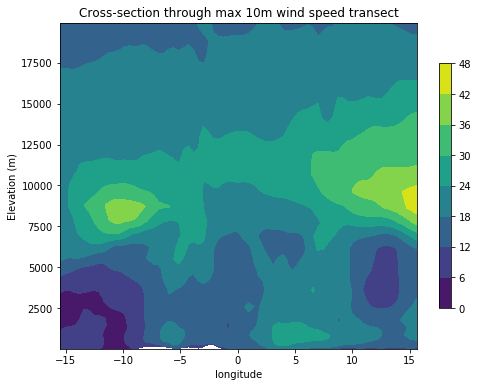

In [83]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes()

cf_three = ax.contourf(lons_new, ApproxElev[:,iwsmx,:], m[:,iwsmx,:])

plt.colorbar(cf_three,shrink=0.75)  

# Label axis
plt.title("Cross-section through max 10m wind speed transect")
plt.xlabel("longitude")
plt.ylabel("Elevation (m)")